In [83]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import tree

pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)
from sklearn.ensemble import VotingRegressor

In [6]:
data = pd.read_csv('football_final.csv')

In [7]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
data

,Name,Age,OVA,POT,Team,Height,Weight,foot,BOV,BP,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,19 Malcom,21,82,89,FC Barcelona,172,74,Left,82,CAM,7,31.000,0.140,70.900,362,79,75,57,80,71.0,401,85,77.0,81,73,85,424,87,82,92.0,79,84.0,366,85,58.0,74,64,85,306,53,26,78,81.0,68,78.0,66,21,28,17.0,53,8,14,15,7,9,1978,418,2,84,79,79,85,27,64
1,O. Richards B,23,74,82,FC Bayern München,174,74,Left,74,LB,8,9.000,0.040,16.700,274,63,56,53,68,34.0,287,71,55.0,34,53,74,393,84,79,82.0,68,80.0,273,43,71.0,80,48,31,292,77,69,56,54.0,36,62.0,215,66,74,75.0,54,11,9,13,10,11,1788,392,1,81,46,60,73,69,63
2,18 S. Azmoun,22,76,84,Rubin Kazan,186,79,Right,75,ST,8,11.500,0.050,20.700,362,64,76,84,67,71.0,326,73,66.0,50,63,74,385,79,79,77.0,74,76.0,372,73,90.0,65,72,72,293,67,34,77,60.0,55,65.0,104,39,33,32.0,54,6,10,14,9,15,1896,400,1,79,73,64,74,40,70
3,Arthur Cabral,23,77,85,FC Basel,186,89,Right,79,ST,8,23.500,0.016,40.000,357,50,79,78,74,76.0,298,73,63.0,30,56,76,358,72,72,72.0,74,68.0,392,78,83.0,74,87,70,305,61,24,77,68.0,75,71.0,79,27,27,25.0,54,12,9,14,13,6,1843,395,1,72,77,63,74,31,78
4,F. Mendy,26,83,86,Real Madrid CF,180,73,Left,84,LWB,3,43.500,0.170,92.400,343,78,63,72,80,50.0,343,80,72.0,35,78,78,424,91,92,81.0,82,78.0,384,69,79.0,89,83,64,365,82,79,80,75.0,49,78.0,238,77,81,80.0,51,7,16,9,10,9,2148,473,1,92,64,76,79,78,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,L. Reis,21,71,79,Hamburger SV,178,78,Right,73,CM,8,4.200,0.007,7.600,287,54,54,57,74,48.0,312,72,54.0,44,69,73,368,71,78,74.0,71,74.0,351,66,80.0,80,66,59,324,69,72,59,73.0,51,68.0,200,68,68,64.0,57,10,15,14,11,7,1899,409,1,75,57,67,72,67,71
2659,R. Muhammed,27,62,62,Sarpsborg FF,184,82,Right,63,RW,0,0.425,0.001,0.531,265,53,58,52,53,49.0,271,65,46.0,57,41,62,383,92,91,80.0,54,66.0,332,61,70.0,73,75,53,255,60,24,58,55.0,58,45.0,91,35,30,26.0,39,6,8,6,8,11,1636,366,1,91,57,51,64,32,71
2660,R. Norrington-Davies B,22,68,76,Sheffield United,181,70,Left,68,LB,8,2.600,0.009,5.500,261,66,41,52,62,40.0,272,61,55.0,46,50,60,354,76,74,68.0,59,77.0,291,48,57.0,78,65,43,266,65,63,51,44.0,43,53.0,197,66,68,63.0,60,14,14,12,9,11,1701,368,1,75,43,56,62,64,68
2661,J. Bursik,20,68,79,Stoke City,187,75,Left,68,GK,11,2.300,0.006,4.800,117,28,20,11,38,20.0,207,21,60.0,53,42,31,248,40,40,40.0,65,63.0,233,50,69.0,35,59,20,142,30,19,4,36.0,53,41.0,46,20,12,14.0,333,67,66,66,65,69,1326,373,1,67,66,66,69,40,65


In [9]:
# X= data.loc[:,columns=["Name","Team","PAC","SHO","PAS","DRI","DEF","PHY"]]
# Xb = data.drop(columns=["Name","Team"])
X  = data.drop(columns=['Value'])
# X = data[["Name","Team","PAC","SHO","PAS","DRI","DEF","PHY"]].copy()
Yb = data["Value"]

In [10]:
X

,Name,Age,OVA,POT,Team,Height,Weight,foot,BOV,BP,Growth,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,19 Malcom,21,82,89,FC Barcelona,172,74,Left,82,CAM,7,0.140,70.900,362,79,75,57,80,71.0,401,85,77.0,81,73,85,424,87,82,92.0,79,84.0,366,85,58.0,74,64,85,306,53,26,78,81.0,68,78.0,66,21,28,17.0,53,8,14,15,7,9,1978,418,2,84,79,79,85,27,64
1,O. Richards B,23,74,82,FC Bayern München,174,74,Left,74,LB,8,0.040,16.700,274,63,56,53,68,34.0,287,71,55.0,34,53,74,393,84,79,82.0,68,80.0,273,43,71.0,80,48,31,292,77,69,56,54.0,36,62.0,215,66,74,75.0,54,11,9,13,10,11,1788,392,1,81,46,60,73,69,63
2,18 S. Azmoun,22,76,84,Rubin Kazan,186,79,Right,75,ST,8,0.050,20.700,362,64,76,84,67,71.0,326,73,66.0,50,63,74,385,79,79,77.0,74,76.0,372,73,90.0,65,72,72,293,67,34,77,60.0,55,65.0,104,39,33,32.0,54,6,10,14,9,15,1896,400,1,79,73,64,74,40,70
3,Arthur Cabral,23,77,85,FC Basel,186,89,Right,79,ST,8,0.016,40.000,357,50,79,78,74,76.0,298,73,63.0,30,56,76,358,72,72,72.0,74,68.0,392,78,83.0,74,87,70,305,61,24,77,68.0,75,71.0,79,27,27,25.0,54,12,9,14,13,6,1843,395,1,72,77,63,74,31,78
4,F. Mendy,26,83,86,Real Madrid CF,180,73,Left,84,LWB,3,0.170,92.400,343,78,63,72,80,50.0,343,80,72.0,35,78,78,424,91,92,81.0,82,78.0,384,69,79.0,89,83,64,365,82,79,80,75.0,49,78.0,238,77,81,80.0,51,7,16,9,10,9,2148,473,1,92,64,76,79,78,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,L. Reis,21,71,79,Hamburger SV,178,78,Right,73,CM,8,0.007,7.600,287,54,54,57,74,48.0,312,72,54.0,44,69,73,368,71,78,74.0,71,74.0,351,66,80.0,80,66,59,324,69,72,59,73.0,51,68.0,200,68,68,64.0,57,10,15,14,11,7,1899,409,1,75,57,67,72,67,71
2659,R. Muhammed,27,62,62,Sarpsborg FF,184,82,Right,63,RW,0,0.001,0.531,265,53,58,52,53,49.0,271,65,46.0,57,41,62,383,92,91,80.0,54,66.0,332,61,70.0,73,75,53,255,60,24,58,55.0,58,45.0,91,35,30,26.0,39,6,8,6,8,11,1636,366,1,91,57,51,64,32,71
2660,R. Norrington-Davies B,22,68,76,Sheffield United,181,70,Left,68,LB,8,0.009,5.500,261,66,41,52,62,40.0,272,61,55.0,46,50,60,354,76,74,68.0,59,77.0,291,48,57.0,78,65,43,266,65,63,51,44.0,43,53.0,197,66,68,63.0,60,14,14,12,9,11,1701,368,1,75,43,56,62,64,68
2661,J. Bursik,20,68,79,Stoke City,187,75,Left,68,GK,11,0.006,4.800,117,28,20,11,38,20.0,207,21,60.0,53,42,31,248,40,40,40.0,65,63.0,233,50,69.0,35,59,20,142,30,19,4,36.0,53,41.0,46,20,12,14.0,333,67,66,66,65,69,1326,373,1,67,66,66,69,40,65


In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Yb)

Xb_train = X_train.drop(columns=['Name','Team','foot','BP'])
Xb_test = X_test.drop(columns=['Name','Team','foot','BP'])

# Decision Tree Regressor

In [14]:
regression = DecisionTreeRegressor(random_state=0,max_depth=15)
regression.fit(Xb_train,Y_train)
y_pred = regression.predict(Xb_test)

In [15]:
Y_test

2055     4.700
1873    27.500
804      8.500
2403     0.475
2643     4.100
         ...  
1754     0.900
2093     4.100
301     21.000
812      0.000
1025    15.500
Name: Value, Length: 666, dtype: float64

In [16]:
regression.score(Xb_train,Y_train),regression.score(Xb_test,Y_test)

(0.9999970919823783, 0.97792273928332)

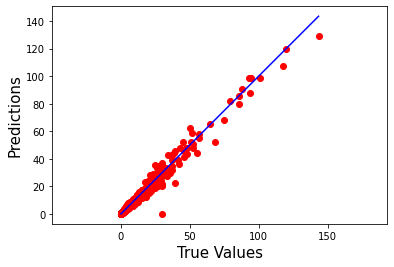

In [17]:
plt.scatter(Y_test,y_pred,color='red')
p1 = max(max(y_pred), max(Y_test))
p2 = min(min(y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [18]:
dot_data = export_graphviz(regression,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("decision_trees.pdf")

True

In [19]:
diff = pd.DataFrame({'Name':list(X_test.Name),'Team':list(X_test.Team),'Actual':list(Y_test),'Predicted':y_pred.reshape(-1)})

In [20]:
diff

,Name,Team,Actual,Predicted
0,N. Chalobah,Fulham,4.700,4.375
1,M. Thuram,Borussia Mönchengladbach,27.500,24.500
2,T. Adarabioyo,Fulham,8.500,9.000
3,E. Kryeziu,Lechia Gdańsk,0.475,0.350
4,N. Raskin,Standard de Liège,4.100,5.000
...,...,...,...,...
661,T. Taylor,Burton Albion,0.900,0.975
662,J. Fleck,Sheffield United,4.100,4.200
663,João Pedro,Cagliari,21.000,18.500
664,18 Kaká,Brazil,0.000,0.000


In [21]:
diff['Difference'] = diff['Actual']-diff['Predicted']

In [22]:
diff = diff.sort_values('Difference',ascending=False)

In [23]:
diff.count() - diff[diff.Difference==0].count()

Name          552
Team          552
Actual        552
Predicted     552
Difference    552
dtype: int64

In [24]:
diff[diff.Difference==0]

,Name,Team,Actual,Predicted,Difference
388,K. Tete,Fulham,7.0,7.0,0.0
391,H. Sarpei,SpVgg Greuther Fürth,1.7,1.7,0.0
57,J. Lewis B,Newcastle United,6.0,6.0,0.0
7,S. Marković,Olympiacos CFP,2.9,2.9,0.0
58,R. Kolo Muani,FC Nantes,9.5,9.5,0.0
...,...,...,...,...,...
179,E. Alvarez,LA Galaxy,1.7,1.7,0.0
178,Jofre Cherta,CD Mirandés,0.6,0.6,0.0
542,A. Gunnarsson,Iceland,0.0,0.0,0.0
541,J. Sosa,Fenerbahçe SK,1.8,1.8,0.0


# Random Forest Regression

In [25]:

forestRegression = RandomForestRegressor(random_state = 0)
forestRegression.fit(Xb_train,Y_train)
forest_pred = forestRegression.predict(Xb_test)

In [29]:
forest_diff = pd.DataFrame({'Name':list(X_test.Name),'Team':list(X_test.Team),'Actual':list(Y_test),'Predicted':y_pred.reshape(-1)})

In [30]:
forest_diff['Difference'] = forest_diff['Predicted'] - forest_diff['Actual']

In [31]:
forestRegression.score(Xb_train,Y_train),forestRegression.score(Xb_test,Y_test)

(0.9976772975546262, 0.9851638176312882)

In [32]:
forestRegression.decision_path(Xb_train)

(<1997x155446 sparse matrix of type '<class 'numpy.int64'>'
 	with 2483834 stored elements in Compressed Sparse Row format>,
 array([     0,   1569,   3072,   4613,   6162,   7777,   9326,  10875,
         12428,  13997,  15534,  17063,  18614,  20141,  21744,  23301,
         24818,  26391,  27946,  29453,  31022,  32553,  34142,  35645,
         37164,  38737,  40266,  41895,  43438,  44955,  46486,  48079,
         49646,  51183,  52754,  54277,  55844,  57405,  58984,  60609,
         62184,  63725,  65292,  66883,  68422,  69971,  71516,  73095,
         74646,  76183,  77744,  79293,  80804,  82329,  83890,  85453,
         87016,  88567,  90134,  91647,  93180,  94733,  96274,  97817,
         99358, 100917, 102462, 104007, 105590, 107143, 108722, 110233,
        111760, 113335, 114880, 116415, 117936, 119501, 121076, 122603,
        124182, 125697, 127230, 128817, 130370, 131941, 133426, 135055,
        136628, 138179, 139816, 141377, 142942, 144521, 146084, 147675,
        149

# Support Vector Regressor

As the split of data into training and test has already been done so now we do feature scaling inorder to
enhance accuracy as we calculate distance of vectors from hyperlane

In [59]:
sc = StandardScaler()
sc.fit(Xb_train)
Xtrain_scaled = sc.transform(Xb_train)
Xtest_scaled = sc.transform(Xb_test)

We take kernel as rbf in this case and later we would take linear 
as well

In [62]:
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(Xtrain_scaled,Y_train)
svr_rbf_pred = svr_rbf.predict(Xtest_scaled)


In [63]:
svr_rbf.score(Xtest_scaled,Y_test)

0.6996127784343923

kernel is linear in this case

In [65]:
svr_linear = SVR(kernel='linear')
svr_linear.fit(Xtrain_scaled,Y_train)
svr_linear_pred = svr_linear.predict(Xtest_scaled)

In [66]:
svr_linear.score(Xtest_scaled,Y_test)

0.9837575329706993

In [67]:
svr_diff = pd.DataFrame({'Name':list(X_test.Name),'Team':list(X_test.Team),'Actual':list(Y_test),'Predicted':svr_linear_pred.reshape(-1)})

In [69]:
svr_diff['Difference'] = svr_diff['Predicted'] - svr_diff['Actual']

In [75]:
svr_diff[svr_diff.Difference>1]

,Name,Team,Actual,Predicted,Difference
15,Barrenetxea,Real Sociedad,9.0,10.505213,1.505213
29,U. Račić,Valencia CF,28.0,32.775323,4.775323
31,R. Koch,Leeds United,19.5,21.247542,1.747542
33,Ansu Fati,FC Barcelona,17.5,24.236387,6.736387
58,R. Kolo Muani,FC Nantes,9.5,10.514773,1.014773
77,Coutinho,FC Barcelona,30.0,32.834408,2.834408
82,Richarlison,Everton,46.5,47.852809,1.352809
91,B. Godfrey,Everton,22.0,24.021856,2.021856
105,Bruno Costa,FC Porto,12.0,13.210034,1.210034
107,Rafa Mir,Sevilla FC,21.5,25.248953,3.748953


Decision Tree regressor for Full data R^2: 0.999997
Decision Tree regressor for test data R^2: 0.977923


So we can see that there is an incredible increase in cost of determination in case of linear and rbf so we go on with linear 

In [45]:
#Linear Regression
linearRegression = LinearRegression()
linearRegression.fit(Xb_train,Y_train)

lm_pred = linearRegression.predict(Xb_test)


In [85]:
ereg = VotingRegressor([('lr', linearRegression), ("rf", forestRegression), ("sv", svr_linear),('dt',regression)])
ereg.fit(Xb_train, Y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor(random_state=0)),
                            ('sv', SVR(kernel='linear')),
                            ('dt',
                             DecisionTreeRegressor(max_depth=15,
                                                   random_state=0))])

In [86]:
voting_pred = ereg.predict(Xb_test)

In [103]:

print(f'Decision Tree regressor for Full data R^2: {regression.score(Xb_train, Y_train):.6f}')
print(f'Decision Tree regressor for test data R^2: {regression.score(Xb_test, Y_test):.6f}')
print("")


print(f'Random Forest regressor for Full data R^2: {forestRegression.score(Xb_train, Y_train):.6f}')
print(f'Random Forest regressor for test data R^2: {forestRegression.score(Xb_test, Y_test):.6f}')
print("")

print(f'Support Vector Regressor for test data R^2: {svr_linear.score(Xtest_scaled,Y_test):.6f}')
print("")

print(f'Voting regressor for Full data R^2: {ereg.score(Xb_train, Y_train):.6f}')
print(f'Voting regressor for test data R^2: {ereg.score(Xb_test, Y_test):.6f}')
print("")


Decision Tree regressor for Full data R^2: 0.999997
Decision Tree regressor for test data R^2: 0.977923

Random Forest regressor for Full data R^2: 0.997677
Random Forest regressor for test data R^2: 0.985164

Support Vector Regressor for test data R^2: 0.983758

Voting regressor for Full data R^2: 0.989985
Voting regressor for test data R^2: 0.978456



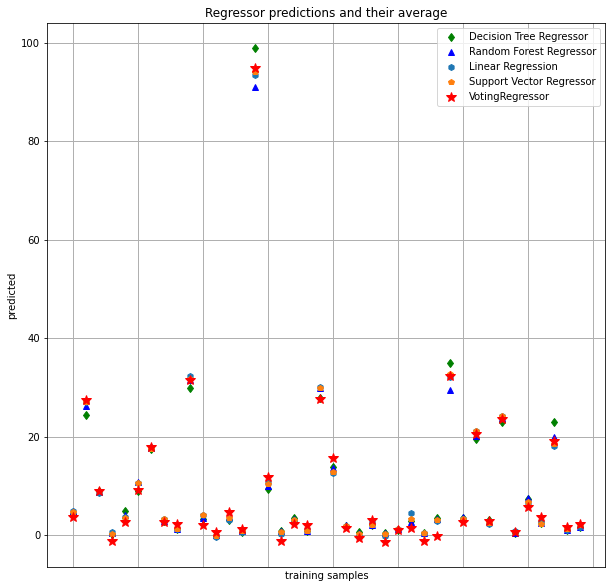

In [97]:
#All Regression and its Predicted value
plt.figure(figsize=(10,10))
plt.plot(y_pred[:40], "gd", label="Decision Tree Regressor")
plt.plot(forest_pred[:40], "b^", label="Random Forest Regressor")
plt.plot(lm_pred[:40],'h',label='Linear Regression')
plt.plot(svr_linear_pred[:40],'p',label='Support Vector Regressor')
plt.plot(voting_pred[:40], "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")
plt.grid(linewidth = 1)
plt.show()

In [98]:
data.columns

Index(['Name', 'Age', 'OVA', 'POT', 'Team', 'Height', 'Weight', 'foot', 'BOV',
       'BP', 'Growth', 'Value', 'Wage', 'Release Clause', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY'],
      dtype='object')